## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

## Ignore Warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Reading the files

In [4]:
# read data in pandas dataframe
df = pd.read_csv('train.csv',low_memory=False)
pf = pd.read_csv('test.csv',low_memory=False)

## Data Exploration

In [5]:
df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0.0,1.0,1.0,N,1.0,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0.0,1.0,1.0,N,1.0,0.3,21.36
2,2,2,68.0,90.0,1.50,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0.0,1.0,1.0,N,0.0,0.3,8.80
3,3,2,142.0,234.0,1.50,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0.0,1.0,1.0,N,0.0,0.3,14.80
4,4,2,238.0,238.0,0.00,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0.0,2.0,1.0,N,0.0,0.3,4.80


#### Info will help us to determine the data type of different columns, total number of features, total number of rows in our dataset


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
ID                    1048575 non-null int64
vendor_id             1048575 non-null object
pickup_loc            1048574 non-null float64
drop_loc              1048574 non-null float64
driver_tip            1048573 non-null float64
mta_tax               1048574 non-null object
distance              1048574 non-null float64
pickup_time           1048574 non-null object
drop_time             1048574 non-null object
num_passengers        1048574 non-null float64
toll_amount           1048573 non-null float64
payment_method        1048574 non-null float64
rate_code             1048574 non-null float64
stored_flag           1048574 non-null object
extra_charges         1048574 non-null float64
improvement_charge    1048573 non-null float64
total_amount          1048573 non-null float64
dtypes: float64(11), int64(1), object(5)
memory usage: 136.0+ MB


#### describe will help us to determine about the scaling and range of our dataset

In [71]:
df.describe()

,ID,pickup_loc,drop_loc,driver_tip,distance,num_passengers,toll_amount,payment_method,rate_code,extra_charges,improvement_charge,total_amount
count,1.048575e+06,1.048574e+06,1.048574e+06,1.048573e+06,1.048574e+06,1.048574e+06,1.048573e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048573e+06,1.048573e+06
mean,5.242870e+05,1.648085e+02,1.626675e+02,1.895219e+00,2.859832e+00,1.590696e+00,3.458530e-01,1.317943e+00,1.043368e+00,3.415165e-01,2.999187e-01,1.622721e+01
std,3.026977e+05,6.579282e+01,6.953073e+01,2.653937e+00,3.709541e+00,1.253700e+00,2.138421e+00,4.853266e-01,5.621114e-01,4.837718e-01,4.936538e-03,1.508592e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,1.250000e+02,1.130000e+02,0.000000e+00,9.300000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e-01,8.500000e+00
50%,5.242870e+05,1.620000e+02,1.620000e+02,1.450000e+00,1.600000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e-01,1.176000e+01
75%,7.864305e+05,2.330000e+02,2.330000e+02,2.450000e+00,2.900000e+00,2.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,5.000000e-01,3.000000e-01,1.775000e+01
max,1.048574e+06,2.650000e+02,2.650000e+02,4.000000e+02,1.138000e+02,9.000000e+00,9.057600e+02,4.000000e+00,9.900000e+01,6.500000e+00,3.000000e-01,2.759370e+03


In [72]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            1
drop_loc              1
driver_tip            2
mta_tax               1
distance              1
pickup_time           1
drop_time             1
num_passengers        1
toll_amount           2
payment_method        1
rate_code             1
stored_flag           1
extra_charges         1
improvement_charge    2
total_amount          2
dtype: int64

## Data Cleaning

In [73]:
print(df.iloc[599121])

ID                                                      599121
vendor_id             +ACI-  +ACIAIg-status+ACIAIg- : 500+ACI-
pickup_loc                                                 NaN
drop_loc                                                   NaN
driver_tip                                                 NaN
mta_tax                                                    NaN
distance                                                   NaN
pickup_time                                                NaN
drop_time                                                  NaN
num_passengers                                             NaN
toll_amount                                                NaN
payment_method                                             NaN
rate_code                                                  NaN
stored_flag                                                NaN
extra_charges                                              NaN
improvement_charge                                     

In [74]:
print(df.iloc[79863])

ID                                     79863
vendor_id                                  1
pickup_loc                               170
drop_loc                                 107
driver_tip                               NaN
mta_tax                               0+AHs-
distance                                 0.9
pickup_time           04/07/2017 03:25:09 PM
drop_time             04/07/2017 03:31:47 PM
num_passengers                             1
toll_amount                              NaN
payment_method                             2
rate_code                                  1
stored_flag                                Y
extra_charges                              0
improvement_charge                       NaN
total_amount                             NaN
Name: 79863, dtype: object


We can ignore both the above samples so drop it

In [75]:
df=df[df.ID!=599121]
df=df[df.ID!=79863]

## Dtype conversion

In [76]:
df['pickup_time'] =  pd.to_datetime(df['pickup_time'], format='%m/%d/%Y %I:%M:%S %p')
df['drop_time'] =  pd.to_datetime(df['drop_time'], format='%m/%d/%Y %I:%M:%S %p')

pf['pickup_time'] =  pd.to_datetime(pf['pickup_time'], format='%m/%d/%Y %I:%M:%S %p')
pf['drop_time'] =  pd.to_datetime(pf['drop_time'], format='%m/%d/%Y %I:%M:%S %p')

In [77]:
df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,0,1,170.0,233.0,1.83,0.5,0.70,2017-04-04 17:59:43,2017-04-04 18:05:04,1.0,0.0,1.0,1.0,N,1.0,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,2017-04-03 19:03:34,2017-04-03 19:20:04,1.0,0.0,1.0,1.0,N,1.0,0.3,21.36
2,2,2,68.0,90.0,1.50,0.5,1.29,2017-04-03 15:06:13,2017-04-03 15:12:30,2.0,0.0,1.0,1.0,N,0.0,0.3,8.80
3,3,2,142.0,234.0,1.50,0.5,2.74,2017-04-04 08:10:52,2017-04-04 08:27:00,1.0,0.0,1.0,1.0,N,0.0,0.3,14.80
4,4,2,238.0,238.0,0.00,0.5,0.45,2017-04-05 14:02:59,2017-04-05 14:05:41,6.0,0.0,2.0,1.0,N,0.0,0.3,4.80


### Extracting hour value and adding a column

In [78]:
df['p_hour'] = df.pickup_time.apply(lambda t: pd.to_datetime(t).hour)

pf['p_hour'] = pf.pickup_time.apply(lambda t: pd.to_datetime(t).hour)

# Data Visualization

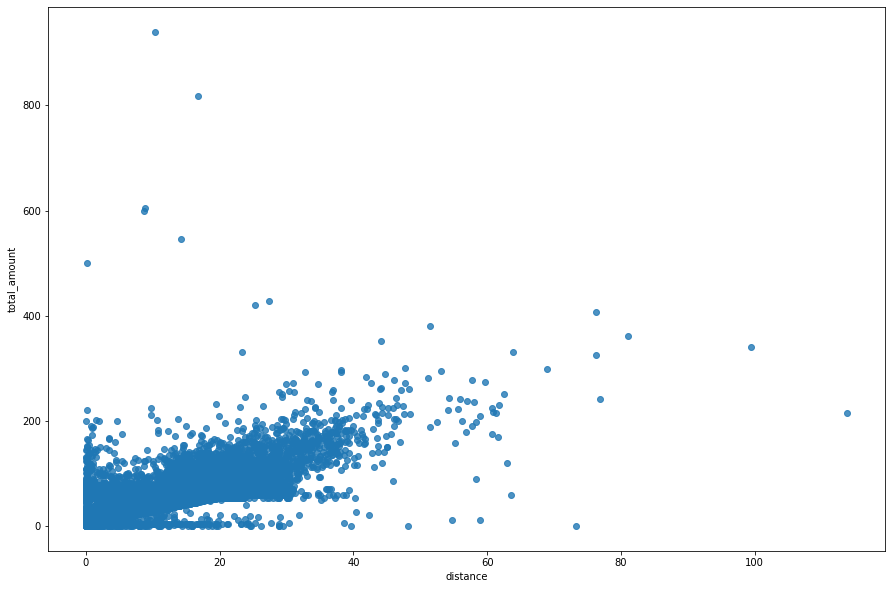

In [79]:
af = df[df['distance']>0]
cor = af['num_passengers']>0
rel = af['total_amount']>0
af[cor & rel]
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax=sns.regplot(x="distance",y="total_amount",fit_reg=False,ci=None,truncate=True,data=af)

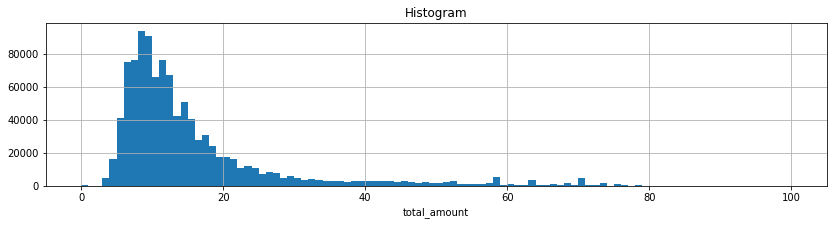

In [80]:
# plot histogram of fare
df[df.total_amount<100].total_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('total_amount')
plt.title('Histogram');

In the histogram of the total_amount there are some small spikes between 60 and 80. This could indicate some fixed fare price (e.g. to/from airport).

In [81]:
df.dtypes

ID                             int64
vendor_id                     object
pickup_loc                   float64
drop_loc                     float64
driver_tip                   float64
mta_tax                       object
distance                     float64
pickup_time           datetime64[ns]
drop_time             datetime64[ns]
num_passengers               float64
toll_amount                  float64
payment_method               float64
rate_code                    float64
stored_flag                   object
extra_charges                float64
improvement_charge           float64
total_amount                 float64
p_hour                         int64
dtype: object

## Dtype conversion

In [82]:
df['vendor_id'] = df['vendor_id'].apply(pd.to_numeric, errors='coerce').astype(np.int64)
df['mta_tax'] = df['mta_tax'].apply(pd.to_numeric, errors='coerce')

In [83]:
df['stored_flag'].replace('N','0',inplace=True)
df['stored_flag'].replace('Y','1',inplace=True)
df['stored_flag'] = df['stored_flag'].apply(pd.to_numeric, errors='coerce').astype(np.int64)

In [84]:
pf['stored_flag'].replace('N','0',inplace=True)
pf['stored_flag'].replace('Y','1',inplace=True)
pf['stored_flag'] = pf['stored_flag'].apply(pd.to_numeric, errors='coerce').astype(np.int64)

Histograms are drawn to observe whether the given dataset is uniform or not

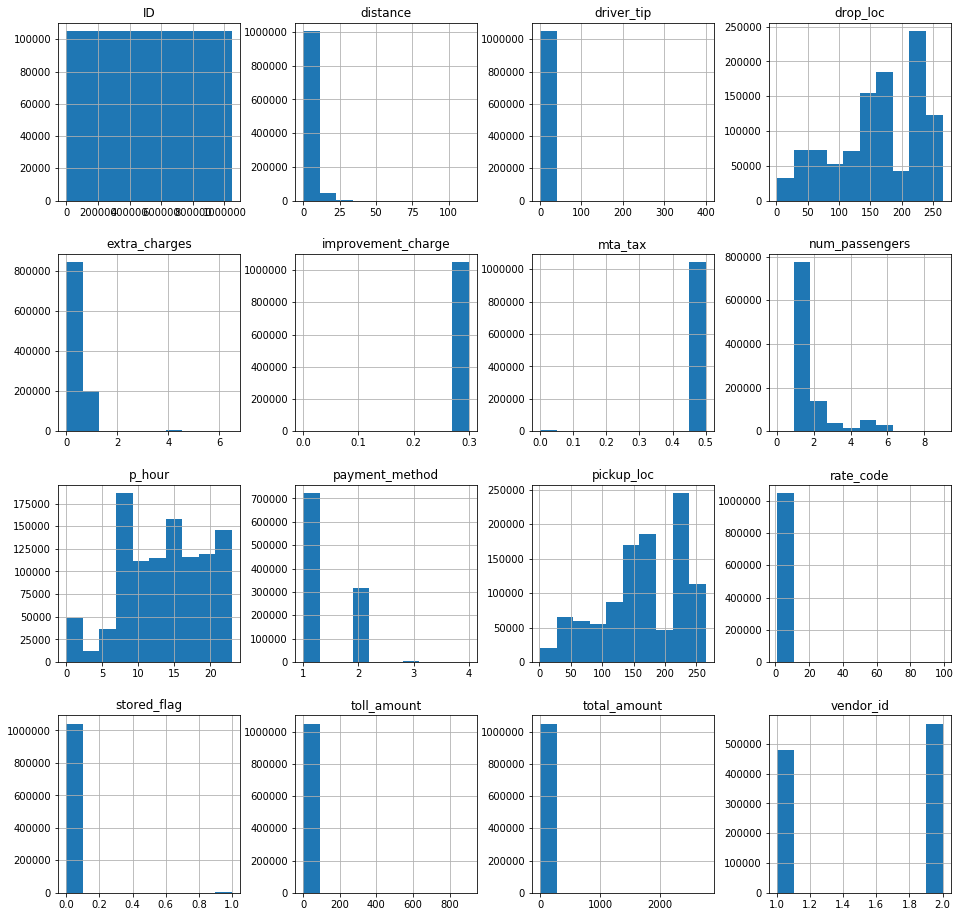

In [85]:
df.hist(figsize=(16,16))
plt.show()

In [86]:
df['driver_tip'].value_counts()

0.00     351304
1.00      64393
2.00      34024
1.50      14669
3.00      10931
          ...  
4.27          1
15.94         1
15.34         1
8.98          1
6.92          1
Name: driver_tip, Length: 2135, dtype: int64

In [87]:
df['improvement_charge'].value_counts()

0.3    1048289
0.0        284
Name: improvement_charge, dtype: int64

In [88]:
df['mta_tax'].value_counts()

0.5    1043304
0.0       5269
Name: mta_tax, dtype: int64

In [89]:
df['rate_code'].value_counts()

1.0     1019630
2.0       22328
5.0        3431
3.0        2522
4.0         628
99.0         25
6.0           9
Name: rate_code, dtype: int64

In [90]:
df['stored_flag'].value_counts()

0    1041404
1       7169
Name: stored_flag, dtype: int64

In [91]:
df['toll_amount'].value_counts()

0.00     991571
5.76      51323
10.50      1106
5.54        669
12.50       606
          ...  
28.26         1
12.59         1
26.00         1
12.66         1
17.78         1
Name: toll_amount, Length: 417, dtype: int64

In [92]:
df['vendor_id'].value_counts()

2    567766
1    480807
Name: vendor_id, dtype: int64

# Heat Map

The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation

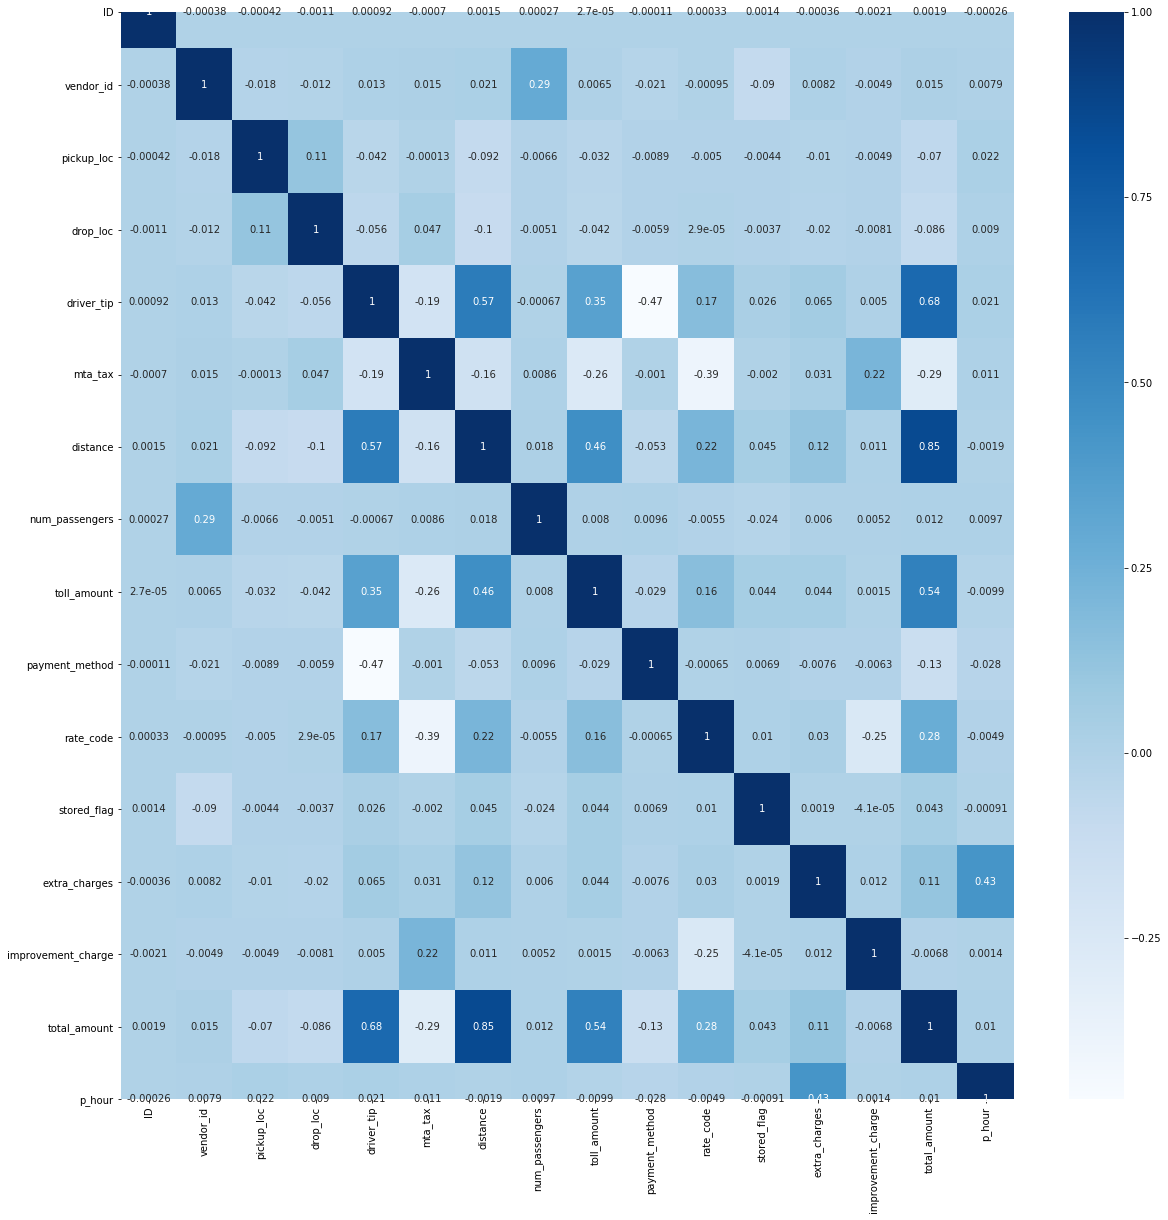

In [93]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

# Data cleaning

In [94]:
cols = ['ID','improvement_charge']
df = df.drop(columns = cols)
pf = pf.drop(columns = cols)

In [95]:
df.isna().sum()

vendor_id         0
pickup_loc        0
drop_loc          0
driver_tip        0
mta_tax           0
distance          0
pickup_time       0
drop_time         0
num_passengers    0
toll_amount       0
payment_method    0
rate_code         0
stored_flag       0
extra_charges     0
total_amount      0
p_hour            0
dtype: int64

In [96]:
df['p_hour'].value_counts()

8     67961
18    66371
19    61474
14    61436
9     61028
12    57799
7     57676
20    57292
13    56823
21    56039
11    55654
10    55513
15    54668
22    50776
17    49611
16    41882
23    38727
6     27106
0     25073
1     14521
5      9676
2      9397
3      6090
4      5980
Name: p_hour, dtype: int64

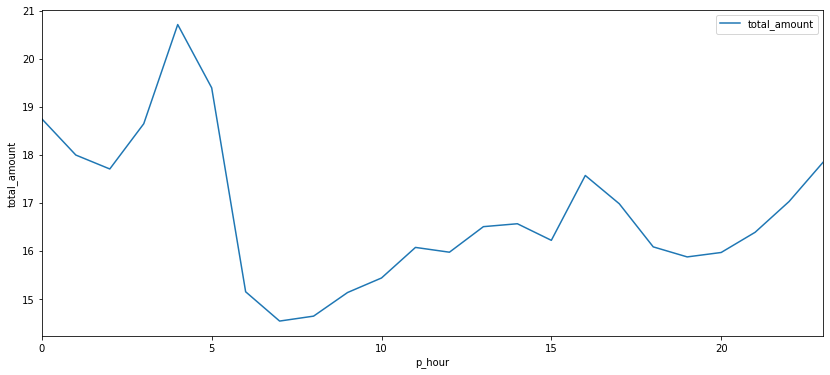

In [97]:
# display pivot table
df.pivot_table('total_amount', index='p_hour').plot(figsize=(14,6))
plt.ylabel('total_amount');

# Calculating duration of trip in seconds

In [98]:
df['diff']=df['drop_time']-df['pickup_time']
pf['diff']=pf['drop_time']-pf['pickup_time']
df['duration']=(df['diff'] / np.timedelta64(1, 's'))
pf['duration']=(pf['diff'] / np.timedelta64(1, 's'))

In [99]:
colms = ['pickup_time','drop_time','diff']
pf = pf.drop(columns = colms)
df = df.drop(columns = colms)

In [100]:
df['total_amount'].describe()

count    1.048573e+06
mean     1.622721e+01
std      1.508592e+01
min      0.000000e+00
25%      8.500000e+00
50%      1.176000e+01
75%      1.775000e+01
max      2.759370e+03
Name: total_amount, dtype: float64

In [101]:
df.sort_values(by=['total_amount'])

,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,total_amount,p_hour,duration
843150,1,145.0,145.0,0.0,0.0,0.0,1.0,0.00,3.0,1.0,0,0.0,0.00,17,4.0
673718,2,193.0,193.0,0.0,0.0,0.0,1.0,0.00,1.0,1.0,0,0.0,0.00,19,217.0
914642,1,137.0,264.0,0.0,0.0,0.0,1.0,0.00,2.0,5.0,0,0.0,0.00,11,0.0
409578,1,161.0,264.0,0.0,0.0,0.0,1.0,0.00,2.0,5.0,0,0.0,0.00,19,0.0
472004,2,264.0,193.0,0.0,0.0,0.0,1.0,0.00,1.0,1.0,0,0.0,0.00,19,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30072,2,264.0,264.0,0.0,0.0,0.0,1.0,0.00,1.0,5.0,0,0.0,825.00,11,0.0
403021,1,138.0,48.0,0.0,0.5,10.3,1.0,905.76,3.0,1.0,0,0.5,939.56,22,1773.0
549733,1,145.0,145.0,0.0,0.0,0.0,1.0,0.00,2.0,4.0,0,0.0,2759.37,11,22.0
15913,1,211.0,264.0,0.0,0.0,0.0,1.0,0.00,2.0,4.0,0,0.0,2759.37,19,0.0


Mean is around 160  so we consider total_amount<200

In [102]:
df = df[df.total_amount<200]

###### payment method free ride is dropped

In [103]:
#df = df[df['payment_method']!=3]
df = df[df['rate_code']!=99]
df.drop(df[(df['distance']==0) & df['duration']>60].index, inplace = True)

In [104]:
df.drop(df[(df['pickup_loc']==df['drop_loc']) & df['duration']>0 & (df['distance']==0) ].index, inplace = True)

## Splitting Data

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X = df.drop('total_amount',axis=1)

In [107]:
X.head()

,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,p_hour,duration
0,1,170.0,233.0,1.83,0.5,0.70,1.0,0.0,1.0,1.0,0,1.0,17,321.0
1,2,151.0,243.0,3.56,0.5,4.64,1.0,0.0,1.0,1.0,0,1.0,19,990.0
2,2,68.0,90.0,1.50,0.5,1.29,2.0,0.0,1.0,1.0,0,0.0,15,377.0
3,2,142.0,234.0,1.50,0.5,2.74,1.0,0.0,1.0,1.0,0,0.0,8,968.0
5,1,230.0,48.0,1.05,0.5,0.40,1.0,0.0,1.0,1.0,0,0.0,9,116.0


In [108]:
y = df.total_amount

In [109]:
y.head()

0     9.13
1    21.36
2     8.80
3    14.80
5     5.35
Name: total_amount, dtype: float64

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

# 1.Using Linear Regression and calculating MSE

In [111]:
#sklearn for importing our model
from sklearn.linear_model import LinearRegression

In [112]:
model1=LinearRegression().fit(X_train,y_train)

In [113]:
pred1 = model1.predict(X_test)

In [114]:
 print(pred1)

[ 8.92448303 28.409201   10.97325817 ... 15.60624872 22.26416207
 22.59268402]


In [115]:
 mean_squared_error(y_test, pred1)

10.236193302011895

# Using Random Forest Regressor and calculating MSE

In [116]:
from sklearn.ensemble import RandomForestRegressor 

In [124]:
model2=RandomForestRegressor(max_depth=10,random_state=0)

In [125]:
model2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [128]:
pred2 = model2.predict(pf)

In [127]:
mean_squared_error(y_test, pred2)

2.4684324307698065

In [ ]:
print(pred2)

# Creating Submission File

In [ ]:
# pred2.shape

In [129]:
yy=[]
for i in range(154235):
    yy.append(i)

In [130]:
predi=pd.DataFrame(pred2)
predi.rename(columns={0:'total_amount'},inplace=True)
predi['ID']=yy
predi = predi[['ID','total_amount']]

In [131]:
predi.to_csv('final4.csv',index=False)